In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Display settings
pd.set_option("display.max_colwidth", 200)

# Load cleaned data
df = pd.read_csv("../data/processed/clean_reviews.csv")

df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,rating,date,bank,source
0,maaliif daddafee install gaafata,3,2025-11-28,Commercial Bank of Ethiopia,Google Play Store
1,good app,5,2025-11-28,Commercial Bank of Ethiopia,Google Play Store
2,This application is very important and advantage for transfer of money and finance in the coutry and foriegn country.,5,2025-11-27,Commercial Bank of Ethiopia,Google Play Store
3,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia,Google Play Store
4,The app makes our life easier. Thank you CBE!,5,2025-11-27,Commercial Bank of Ethiopia,Google Play Store


In [5]:
df.info()
df.describe()
df['bank'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  326 non-null    object
 1   rating  326 non-null    int64 
 2   date    326 non-null    object
 3   bank    326 non-null    object
 4   source  326 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.9+ KB


bank
Commercial Bank of Ethiopia    326
Name: count, dtype: int64

In [6]:
df.isnull().mean() * 100
df.duplicated().sum()

np.int64(0)

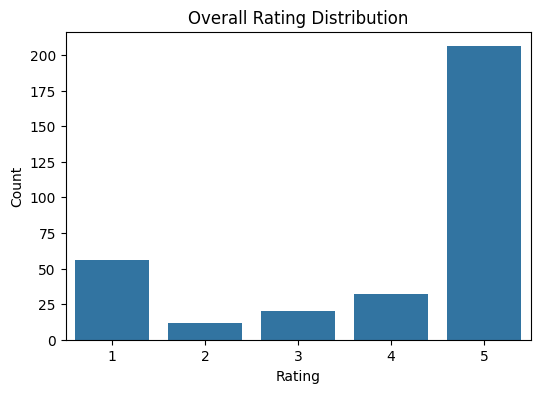

In [7]:
#this is for the visualization of overall rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title("Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


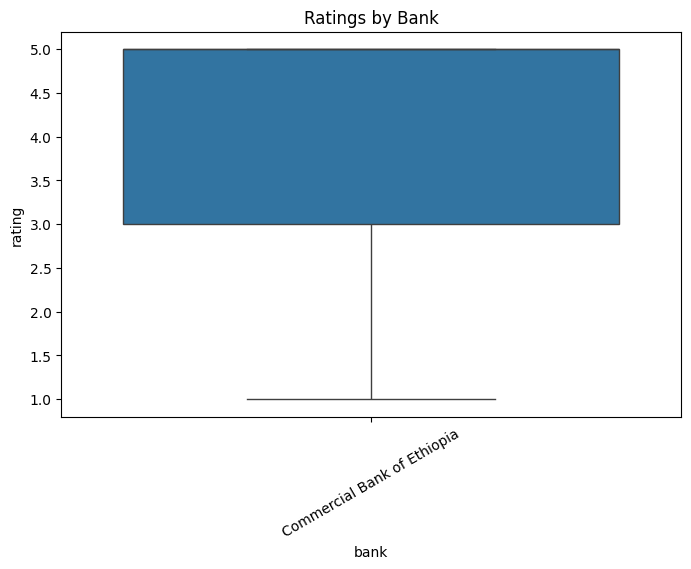

In [8]:
#this for the visualization of ratings by bank for the senario one analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='bank', y='rating', data=df)
plt.title("Ratings by Bank")
plt.xticks(rotation=30)
plt.show()


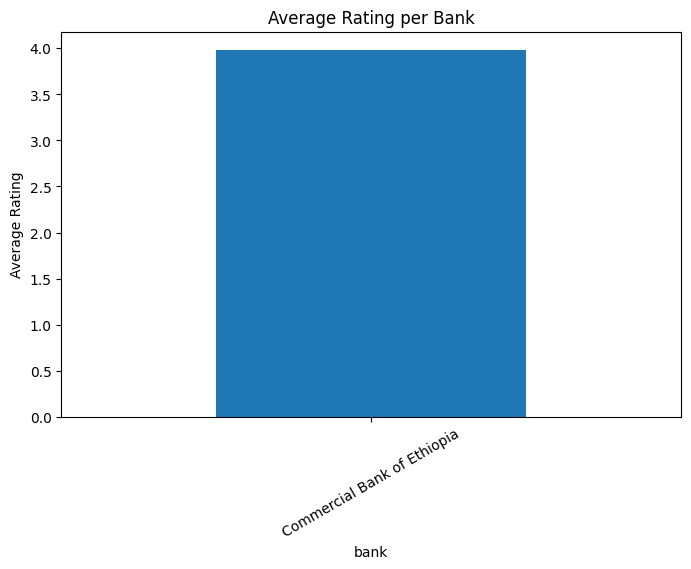

In [9]:
#this for the visualization of average rating per bank for the senario one analysis
avg_rating = df.groupby('bank')['rating'].mean().sort_values()

avg_rating.plot(kind='bar', figsize=(8,5))
plt.title("Average Rating per Bank")
plt.ylabel("Average Rating")
plt.xticks(rotation=30)
plt.show()


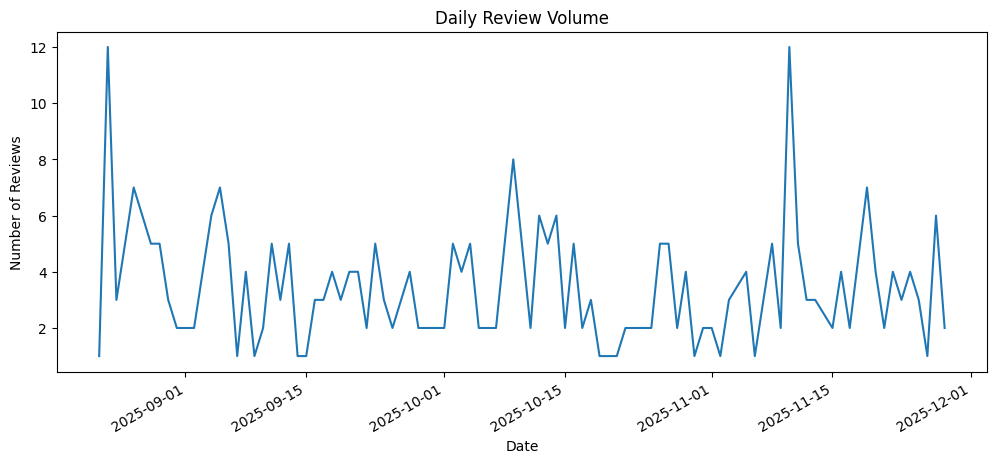

In [10]:
#this for the visualization of daily review volume over time
df['date'] = pd.to_datetime(df['date'])

daily_reviews = df.groupby('date').size()

plt.figure(figsize=(12,5))
daily_reviews.plot()
plt.title("Daily Review Volume")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()


In [14]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)

df[['review', 'clean_review']].head()


,review,clean_review
0,maaliif daddafee install gaafata,maaliif daddafee install gaafata
1,good app,good app
2,This application is very important and advantage for transfer of money and finance in the coutry and foriegn country.,application important advantage transfer money finance coutry foriegn country
3,why didn't work this app?,work app
4,The app makes our life easier. Thank you CBE!,app makes life easier thank cbe


In [15]:
# Word frequency analysis
from collections import Counter
import re

all_words = " ".join(df['clean_review']).split()
word_freq = Counter(all_words)

word_freq.most_common(20)


[('app', 102),
 ('good', 41),
 ('bank', 29),
 ('cbe', 26),
 ('best', 22),
 ('application', 18),
 ('like', 17),
 ('update', 17),
 ('nice', 16),
 ('use', 14),
 ('banking', 13),
 ('work', 12),
 ('service', 12),
 ('money', 10),
 ('branch', 9),
 ('time', 9),
 ('working', 9),
 ('mobile', 9),
 ('ethiopia', 9),
 ('account', 8)]

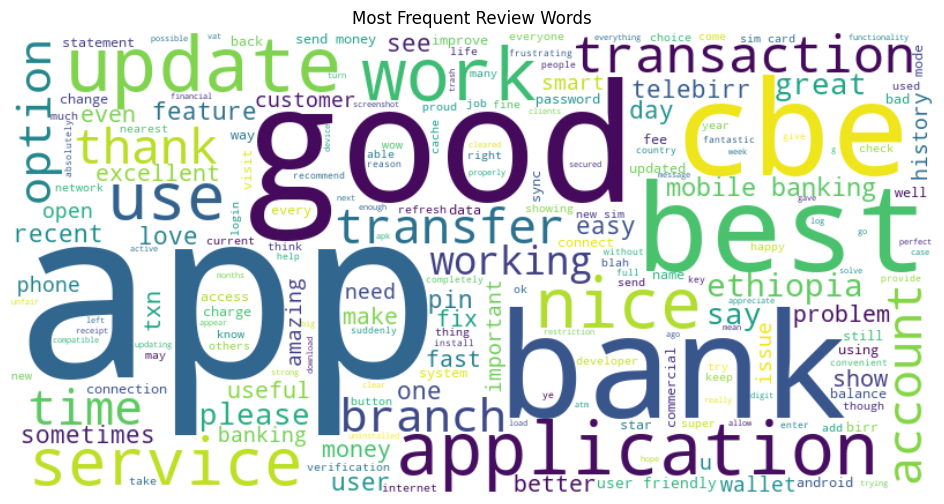

In [ ]:
#this for the visualization of sentiment distribution of the banks reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(df['clean_review'])
)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Review Words")
plt.show()


In [ ]:
#this for the keyword analysis to identify common issues mentioned in reviews
keywords = ['slow', 'crash', 'login', 'error', 'bug', 'transfer', 'fail']

for keyword in keywords:
    df[keyword] = df['clean_review'].str.contains(keyword, case=False)

df[keywords].sum().sort_values(ascending=False)



transfer    12
login        3
slow         1
crash        1
error        1
bug          1
fail         1
dtype: int64

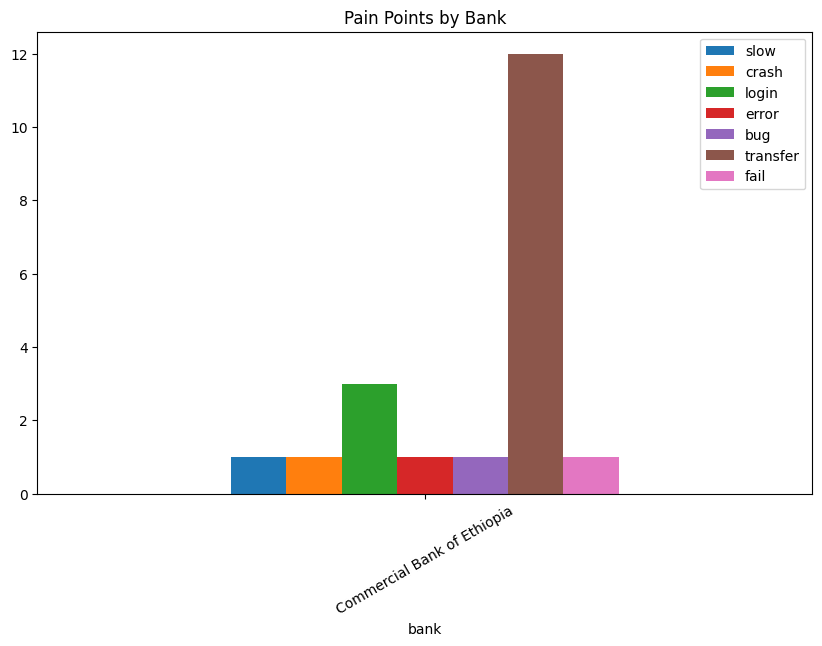

In [ ]:
#this for the visualization of pain points by bank
pain_bank = df.groupby('bank')[keywords].sum()

pain_bank.plot(kind='bar', figsize=(10,6))
plt.title("Pain Points by Bank")
plt.xticks(rotation=30)
plt.show()


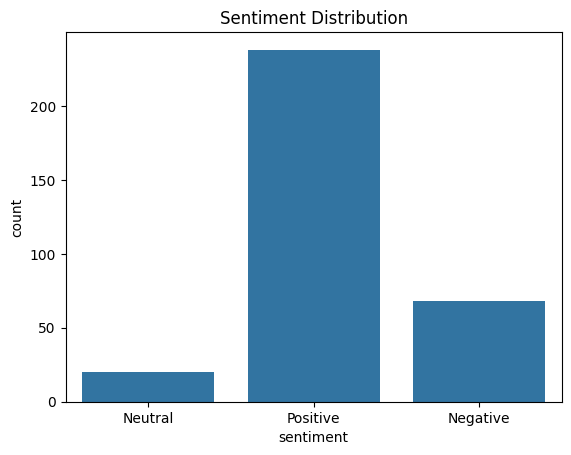

In [ ]:
#this is for the visualization of sentiment distribution of the banks reviews
df['sentiment'] = df['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative' if x <=2 else 'Neutral')

df['sentiment'].value_counts()
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()



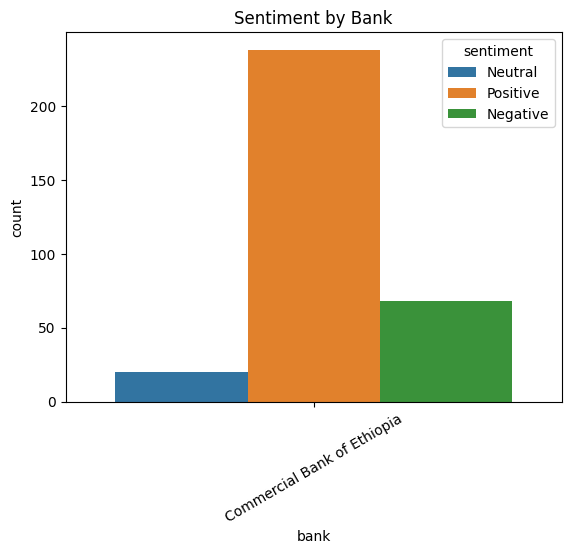

In [ ]:
#this is for the visualization of sentiment distribution of the banks reviews
sns.countplot(x='bank', hue='sentiment', data=df)
plt.xticks(rotation=30)
plt.title("Sentiment by Bank")
plt.show()
